In [1]:
import pandas as pd
data = pd.read_excel("https://github.com/cckmwong/portfolio/raw/main/dataset/regression_data.xlsx") #read the excel file

In [115]:
df = data[["URN", "SCHNAME", "GENDER", "OFSTEDRATING", "KS4_Avg", "KS4_Disadvantaged", "KS4_EAL"]] #extract useful columns as the dataset
df

,URN,SCHNAME,GENDER,OFSTEDRATING,KS4_Avg,KS4_Disadvantaged,KS4_EAL
0,100008,Argyle Primary School,Mixed,Good,0.0,NaN,NaN
1,100009,West Hampstead Primary School,Mixed,Good,0.0,NaN,NaN
2,100010,Brecknock Primary School,Mixed,Good,0.0,NaN,NaN
3,100011,Brookfield Primary School,Mixed,Good,0.0,NaN,NaN
4,100013,Edith Neville Primary School,Mixed,Good,0.0,NaN,NaN
...,...,...,...,...,...,...,...
20794,123512,West Felton CofE Primary School,Mixed,Good,0.0,NaN,NaN
20795,123513,Weston Lullingfields CofE School,Mixed,Good,0.0,NaN,NaN
20796,123517,Wistanstow CofE Primary School,Mixed,Good,0.0,NaN,NaN
20797,123518,Long Mountain CofE Primary School,Mixed,Requires improvement,0.0,NaN,NaN


In [116]:
#rename the Ofsted and gender columns
df = df.rename(columns={'OFSTEDRATING':'Ofsted'}) 
df = df.rename(columns={'GENDER':'Gender'})

#extract rows with valid value of KS4 results as some represent primary schools with KS2 results
df = df[df.KS4_Avg > 0] 
df

,URN,SCHNAME,Gender,Ofsted,KS4_Avg,KS4_Disadvantaged,KS4_EAL
35,100049,Haverstock School,Mixed,Good,42.566667,0.63,0.7
36,100050,Parliament Hill School,Girls,Good,60.766667,0.39,0.36
37,100051,Regent High School,Mixed,Good,42.600000,0.72,0.87
38,100052,Hampstead School,Mixed,Good,38.300000,0.45,0.39
39,100053,Acland Burghley School,Mixed,Good,43.766667,0.42,0.29
...,...,...,...,...,...,...,...
20547,144766,Ron Dearing UTC,Mixed,Outstanding,37.066667,0.19,0.06
20548,144768,The Suthers School,Mixed,Requires improvement,39.700000,0.23,0.05
20550,144773,Lawn Manor Academy,Mixed,Requires improvement,25.200000,0.37,0.37
20589,122854,Chilwell School,Mixed,Good,38.766667,0.18,0.17


In [117]:
#drop rows with KS4_Disadvantaged with "NP" or null values
df = df.drop(df[df['KS4_Disadvantaged']=="NP"].index)
df = df.dropna(subset=["KS4_Disadvantaged"], axis=0)
df["KS4_Disadvantaged"].unique()

array([0.63, 0.39, 0.72, 0.45, 0.42, 0.35, 0.44, 0.55, 0.32, 0.58, 0.28,
       0.38, 0.29, 0.2, 0.59, 0.31, 0.43, 0.75, 0.53, 0.49, 0.5, 0.41,
       0.21, 0.34, 0.52, 0.51, 0.56, 0.1, 0.36, 0.37, 0.18, 0.14, 0.48,
       0.23, 0.27, 0.15, 0.3, 0.46, 0.4, 0.57, 0.64, 0.22, 0.19, 0.54,
       0.16, 0.12, 0.33, 0.24, 0.6, 0.66, 0.09, 0.08, 0.25, 0.61, 0.13,
       0.65, 0.17, 0.06, 0.03, 0.02, 0.11, 0.47, 0.26, 0.05, 0.07, 0.04,
       0.85, 0.62, 0.68, 0.73, 0.67, 0, 0.95, 0.96, 0.81, 0.01, 0.89,
       0.76, 0.69, 0.92, 0.8, 0.71, 0.93, 0.9, 0.77, 0.87, 0.7],
      dtype=object)

In [118]:
#change the data type of the values of KS4_Disadvantaged from object to float
df[["KS4_Disadvantaged"]] = df[["KS4_Disadvantaged"]].astype("float")
df["KS4_Disadvantaged"].unique()

array([0.63, 0.39, 0.72, 0.45, 0.42, 0.35, 0.44, 0.55, 0.32, 0.58, 0.28,
       0.38, 0.29, 0.2 , 0.59, 0.31, 0.43, 0.75, 0.53, 0.49, 0.5 , 0.41,
       0.21, 0.34, 0.52, 0.51, 0.56, 0.1 , 0.36, 0.37, 0.18, 0.14, 0.48,
       0.23, 0.27, 0.15, 0.3 , 0.46, 0.4 , 0.57, 0.64, 0.22, 0.19, 0.54,
       0.16, 0.12, 0.33, 0.24, 0.6 , 0.66, 0.09, 0.08, 0.25, 0.61, 0.13,
       0.65, 0.17, 0.06, 0.03, 0.02, 0.11, 0.47, 0.26, 0.05, 0.07, 0.04,
       0.85, 0.62, 0.68, 0.73, 0.67, 0.  , 0.95, 0.96, 0.81, 0.01, 0.89,
       0.76, 0.69, 0.92, 0.8 , 0.71, 0.93, 0.9 , 0.77, 0.87, 0.7 ])

In [119]:
#drop rows with KS4_EAL with null values
df = df.dropna(subset=["KS4_EAL"], axis=0)
df["KS4_EAL"].unique()

array([0.7, 0.36, 0.87, 0.39, 0.29, 0.38, 0.43, 0.48, 0.25, 0.21, 0.14,
       0.44, 0.54, 0.65, 0.66, 0.3, 0.69, 0.63, 0.13, 0.22, 0.76, 0.02,
       0.03, 0.2, 0.27, 0, 0.01, 0.33, 0.16, 0.23, 0.05, 0.53, 0.04, 0.73,
       0.55, 0.26, 0.74, 0.52, 0.07, 0.35, 0.37, 0.1, 0.32, 0.47, 0.62,
       0.49, 0.71, 0.42, 0.19, 0.75, 0.83, 0.72, 0.86, 0.56, 0.06, 0.45,
       0.18, 0.24, 0.64, 0.11, 0.15, 0.59, 0.79, 0.41, 0.67, 0.6, 0.12,
       0.61, 0.5, 0.28, 0.99, 0.09, 0.97, 0.57, 0.31, 0.81, 0.17, 0.4,
       0.08, 0.9, 0.68, 0.34, 0.93, 0.88, 0.84, 0.8, 0.77, 0.78, 0.46,
       0.51, 0.94, 0.58, 0.85, 0.89, 0.82], dtype=object)

In [120]:
#change the data type of the values of KS4_EAL from object to float
df[["KS4_EAL"]] = df[["KS4_EAL"]].astype("float")
df["KS4_EAL"].unique()

array([0.7 , 0.36, 0.87, 0.39, 0.29, 0.38, 0.43, 0.48, 0.25, 0.21, 0.14,
       0.44, 0.54, 0.65, 0.66, 0.3 , 0.69, 0.63, 0.13, 0.22, 0.76, 0.02,
       0.03, 0.2 , 0.27, 0.  , 0.01, 0.33, 0.16, 0.23, 0.05, 0.53, 0.04,
       0.73, 0.55, 0.26, 0.74, 0.52, 0.07, 0.35, 0.37, 0.1 , 0.32, 0.47,
       0.62, 0.49, 0.71, 0.42, 0.19, 0.75, 0.83, 0.72, 0.86, 0.56, 0.06,
       0.45, 0.18, 0.24, 0.64, 0.11, 0.15, 0.59, 0.79, 0.41, 0.67, 0.6 ,
       0.12, 0.61, 0.5 , 0.28, 0.99, 0.09, 0.97, 0.57, 0.31, 0.81, 0.17,
       0.4 , 0.08, 0.9 , 0.68, 0.34, 0.93, 0.88, 0.84, 0.8 , 0.77, 0.78,
       0.46, 0.51, 0.94, 0.58, 0.85, 0.89, 0.82])

In [121]:
df.reset_index(drop=True, inplace=True) #reset the index of the dataset
df

,URN,SCHNAME,Gender,Ofsted,KS4_Avg,KS4_Disadvantaged,KS4_EAL
0,100049,Haverstock School,Mixed,Good,42.566667,0.63,0.70
1,100050,Parliament Hill School,Girls,Good,60.766667,0.39,0.36
2,100051,Regent High School,Mixed,Good,42.600000,0.72,0.87
3,100052,Hampstead School,Mixed,Good,38.300000,0.45,0.39
4,100053,Acland Burghley School,Mixed,Good,43.766667,0.42,0.29
...,...,...,...,...,...,...,...
3145,144766,Ron Dearing UTC,Mixed,Outstanding,37.066667,0.19,0.06
3146,144768,The Suthers School,Mixed,Requires improvement,39.700000,0.23,0.05
3147,144773,Lawn Manor Academy,Mixed,Requires improvement,25.200000,0.37,0.37
3148,122854,Chilwell School,Mixed,Good,38.766667,0.18,0.17


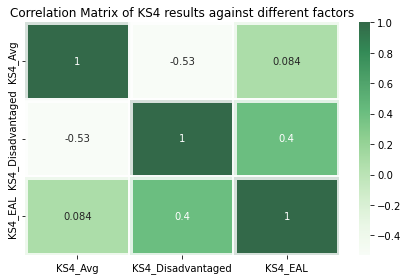

In [122]:
#extract columns of KS4_Avg, KS4_Disadvantaged and KS4_EAL for the correlation analysis
df2 = df[["KS4_Avg", "KS4_Disadvantaged", "KS4_EAL"]]
df2 = df2.drop_duplicates()

import matplotlib.pyplot as plt
import seaborn as sb
#correlation maxtrix of KS4_Avg, KS4_Disadvantaged and KS4_EAL
sb.heatmap(df2.corr(), cmap = "Greens", linecolor = "white", linewidth = 5, annot = True, alpha = 0.8)
plt.title("Correlation Matrix of KS4 results against different factors")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='KS4_Disadvantaged', ylabel='KS4_Avg'>

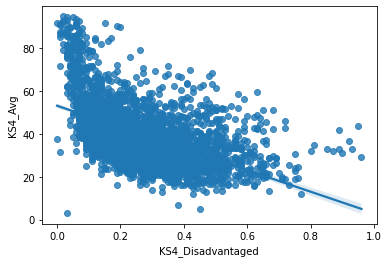

In [123]:
#check the statistical significance of the correlation between the proportion of Disadvantaged students and the KS4 results
import seaborn as sns
sns.regplot(x="KS4_Disadvantaged", y="KS4_Avg", data=df)

In [124]:
#F statistics of the correlation between KS4_Disadvantaged and KS4_Avg
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['KS4_Disadvantaged'], df['KS4_Avg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

#the p value is less than alpha (0.05) and the correlation coefficient is -0.53, showing KS4_Disadvantaged 
#has fairly strong negative correlation to the KS4 results

The Pearson Correlation Coefficient is -0.5284054854919888  with a P-value of P =  4.152475928697588e-226


In [125]:
#F statistics of the correlation between the proportion of studets with English as an additional language and KS4_Avg
pearson_coef, p_value = stats.pearsonr(df['KS4_EAL'], df['KS4_Avg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

#the p value is less than alpha (0.05) and the correlation coefficient is merely 0.084, showing KS4_EAL 
#has very weak correlation to the KS4 results

The Pearson Correlation Coefficient is 0.08389995147142085  with a P-value of P =  2.41331754806385e-06


<AxesSubplot:xlabel='Ofsted', ylabel='KS4_Avg'>

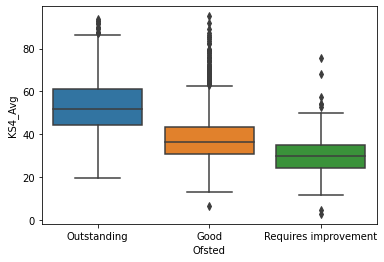

In [127]:
#check the statistical significance of the correlation between the Ofsted Ratings and the KS4 results using ANOVA
#only extract the rows with Ofsted ratings of "Outstanding", "Good" and "Requires improvement"
df = df.loc[(df.Ofsted == 'Outstanding') | (df.Ofsted == 'Good') | (df.Ofsted == 'Requires improvement')]
sns.boxplot(x = "Ofsted", y = "KS4_Avg", data = df, order=["Outstanding", "Good", "Requires improvement"])

In [128]:
df_grouped = df[['Ofsted', 'KS4_Avg']]
grouped = df_grouped[['Ofsted', 'KS4_Avg']].groupby(['Ofsted'])

In [129]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between the three 
#attributes of the Ofsted ratings and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Outstanding')['KS4_Avg'], grouped.get_group('Good')['KS4_Avg'], grouped.get_group('Requires improvement')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 501.89889506905024 , P = 6.238086858191168e-186


In [130]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between 
#"Outstanding" and "Good" and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Outstanding')['KS4_Avg'], grouped.get_group('Good')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 675.8976749219131 , P = 6.061413751685579e-131


In [131]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between "Outstanding" 
#and "Requires improvement" and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Outstanding')['KS4_Avg'], grouped.get_group('Requires improvement')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 803.0431871236392 , P = 1.2809627738159285e-123


In [132]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between "Good" and 
#"Requires improvement" and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Good')['KS4_Avg'], grouped.get_group('Requires improvement')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 155.6022922882696 , P = 1.4111142596420583e-34


<AxesSubplot:xlabel='Gender', ylabel='KS4_Avg'>

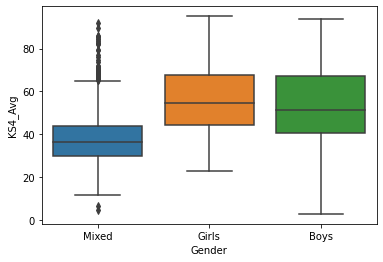

In [133]:
#check the statistical significance of the correlation between the gender and the KS4 results using ANOVA
sns.boxplot(x = "Gender", y = "KS4_Avg", data = df)

In [134]:
df_grouped = df[['Gender', 'KS4_Avg']]
grouped = df_grouped[['Gender', 'KS4_Avg']].groupby(['Gender'])

In [21]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between the 
#three attributes of Gender and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Mixed')['KS4_Avg'], grouped.get_group('Girls')['KS4_Avg'], grouped.get_group('Boys')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 289.5374837407162 , P = 1.3396107132977622e-114


In [22]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between "Mixed" 
#and "Girls" and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Mixed')['KS4_Avg'], grouped.get_group('Girls')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 429.9503035503544 , P = 2.0543444373502938e-88


In [23]:
#p value is less than alpha of 0.05, showing the statistical significance of the correlation between "Mixed" 
#and "Boys" and KS4 results 
f_val, p_val = stats.f_oneway(grouped.get_group('Mixed')['KS4_Avg'], grouped.get_group('Boys')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 219.78606508190978 , P = 9.645830053446995e-48


In [24]:
#p value is greater than alpha of 0.05, the correlation between "Mixed" and "Girls" and KS4 results may not 
#have statistical significance
f_val, p_val = stats.f_oneway(grouped.get_group('Girls')['KS4_Avg'], grouped.get_group('Boys')['KS4_Avg'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 3.4280490150712017 , P = 0.06512485025435175


In [135]:
#From the above analysis, conclude that KS4_Disadvantaged and Ofsted ratings are fairly good independent variables for KS4 results

#set the dummy variables ("Good", "Outstanding" and "Requires improvement") for the categorical variable Ofsted 
dummy_var = pd.get_dummies(df["Ofsted"])
df = pd.concat([df, dummy_var], axis=1) #add the columns of the dummy variables of Ofsted rating to the original dataset
df.drop("Ofsted", axis=1, inplace=True) #remove the original Ofsted rating column
df

,URN,SCHNAME,Gender,KS4_Avg,KS4_Disadvantaged,KS4_EAL,Good,Outstanding,Requires improvement
0,100049,Haverstock School,Mixed,42.566667,0.63,0.70,1,0,0
1,100050,Parliament Hill School,Girls,60.766667,0.39,0.36,1,0,0
2,100051,Regent High School,Mixed,42.600000,0.72,0.87,1,0,0
3,100052,Hampstead School,Mixed,38.300000,0.45,0.39,1,0,0
4,100053,Acland Burghley School,Mixed,43.766667,0.42,0.29,1,0,0
...,...,...,...,...,...,...,...,...,...
3145,144766,Ron Dearing UTC,Mixed,37.066667,0.19,0.06,0,1,0
3146,144768,The Suthers School,Mixed,39.700000,0.23,0.05,0,0,1
3147,144773,Lawn Manor Academy,Mixed,25.200000,0.37,0.37,0,0,1
3148,122854,Chilwell School,Mixed,38.766667,0.18,0.17,1,0,0


In [142]:
#Develop multiple linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_data = df[['KS4_Disadvantaged','Outstanding', 'Good', 'Requires improvement']]
y_data = df['KS4_Avg']
#split 90% of the data to be training data and the remaining 10% as testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1) 

lr = LinearRegression() #Create the linear regression object
lr.fit(x_train, y_train) #fittinng the model with the training data
print("The intercept is ", lr.intercept_, "and the coefficients are ", lr.coef_, "respectively.")

The intercept is  50.27203466668245 and the coefficients are  [-35.14783252  11.09759244  -2.83797084  -8.2596216 ] respectively.


In [49]:
#From the above analysis, the multiple linear regression model is as follows:
#KS4_Avg = 50.3 - 35.1*KS4_Disadvantaged + 11.1*Outstanding - 2.8*Good - 8.3*Requires improvement

#where Outstanding, Good and Requires improvement are dummy variables taking value of either 0 or 1

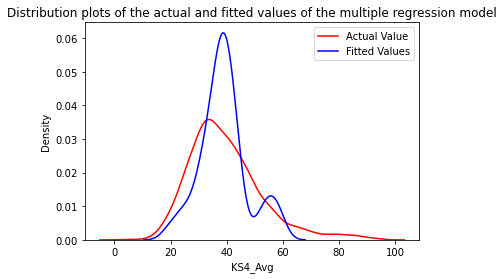

The score of the multiple linear regression model is 0.437 .


In [149]:
#Evaluate the fitness of the model by comparing the distribution plots between the actual and fitted values 
#as well as the coefficient of determination (i.e. the score) of the regression model
Y_hat = lr.predict(x_test) #First make the prediction using testing data

#Sketch the distribution plot to see if the fitted values are reasonably close to the actual values
ax1 = sns.kdeplot(data = y_data, color="r", label="Actual Value")
sns.kdeplot(data = Y_hat, color="b", label="Fitted Values" , ax=ax1)
plt.title("Distribution plots of the actual and fitted values of the multiple regression model")
plt.legend(loc='best')
plt.show()

#calculate the score of the multiple regression model
print("The score of the multiple linear regression model is", round(lr.score(x_test, y_test), 3), ".")